![ex_49.jpg](./ex_49.jpg)

\begin{equation}
    \dot{D} = \alpha E \\
    W = \frac{1}{1-E} \\
    R = \dot{E} = \frac{D}{W} = D*(1 - E) \\
    C = \frac{D}{R} \xi
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

\begin{equation}
    y = \begin{pmatrix}
        D \\
        E
    \end{pmatrix}
\end{equation}

In [2]:
def deriv(y, t, alpha):
    W = 1/(1-y[1])
    return np.array([alpha*y[1], y[0]/W])

In [3]:
def rk4(y, t, alpha, dt):
    for i in range(len(t)-1):
        k1 = deriv(y[i][:], t[i], alpha) * dt
        k2 = deriv(y[i][:] + k1/2, t[i] + dt/2, alpha) * dt
        k3 = deriv(y[i][:] + k2/2, t[i] + dt/2, alpha) * dt
        k4 = deriv(y[i][:] + k3, t[i], alpha) * dt
        y[i+1][:] = y[i][:] + (k1 + 2*k2 + 2*k3 + k4)/6
    #return y

In [4]:
alpha = 2.0
xi = 0.01
D0 = 0.1

t0 = 0
tf = 5
dt = 0.1
N = int((tf - t0)/dt)

y = np.zeros([N,2])
#y_dot = np.zeros([N,2])

y[0][0] = D0

t = np.linspace(t0, tf, N)

In [5]:
rk4(y, t, alpha, dt)

In [6]:
#y

In [7]:
# Demand
D = np.transpose(y)[0]
# Extracted quantity
E = np.transpose(y)[1]
# Difficulty of extraction
W = 1/(1-E)

In [8]:
# Extraction rate
R = D/W
# Cost function
C = D/R * xi

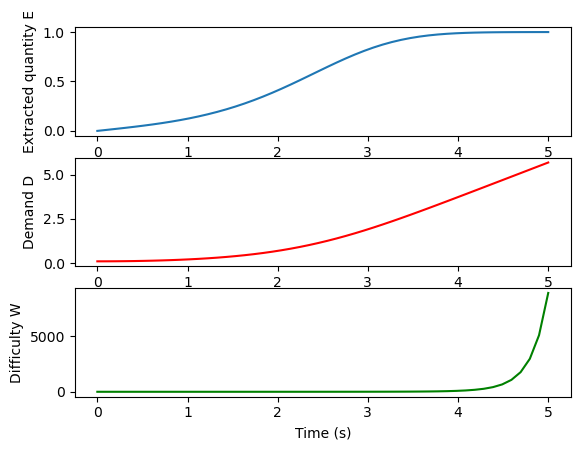

In [9]:
fig, (ax3, ax4, ax5) = plt.subplots(3,1)
ax3.plot(t, E)
ax3.set_ylabel('Extracted quantity E')
ax4.plot(t, D, color = 'r')
ax4.set_ylabel('Demand D')
ax5.plot(t, W, color = 'g')
ax5.set_ylabel('Difficulty W')
plt.xlabel('Time (s)')
plt.show()

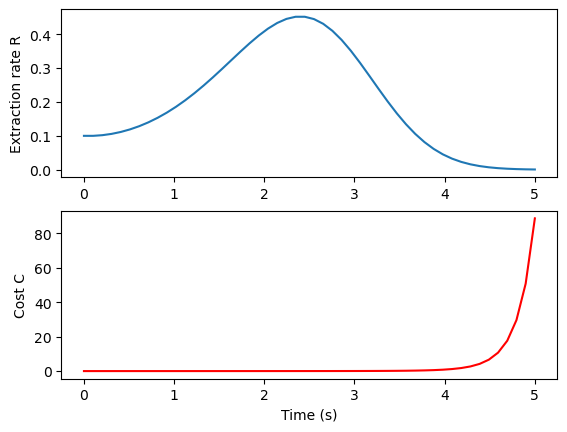

In [10]:
fig, (ax1, ax2) = plt.subplots(2,1)
ax1.plot(t, R)
ax1.set_ylabel('Extraction rate R')
ax2.plot(t, C, color = 'r')
plt.xlabel('Time (s)')
ax2.set_ylabel('Cost C')
plt.show()

The extraction rate $R(t)$ rises initially as demand grows but eventually declines as the resource depletes.

The cost $C(t)$ remains low at first when the offer is plentiful but it increases dramatically at the end as the resource becomes harder to extract.

In [21]:
def deriv2(t, y, alpha = 2.0):
    return np.array([alpha*y[1], y[0] * (1 - y[1])])

In [22]:
sol = solve_ivp(deriv2, t_span = (t0,tf), y0 = [0.1, 0.0], t_eval = t, method = 'RK45')

In [23]:
D_45 = sol.y[0]
E_45 = sol.y[1]

In [24]:
W_45 = 1/(1-E_45)
R_45 = D_45/W_45
C_45 = D_45/R_45 * xi

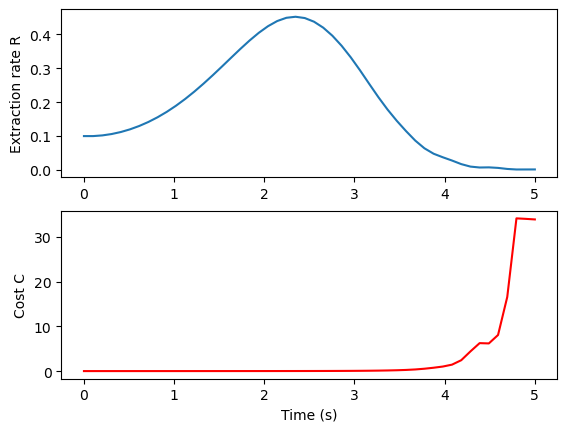

In [25]:
fig, (ax8, ax9) = plt.subplots(2,1)
ax8.plot(sol.t, R_45)
ax8.set_ylabel('Extraction rate R')
ax9.plot(sol.t, C_45, color = 'r')
plt.xlabel('Time (s)')
ax9.set_ylabel('Cost C')
plt.show()